In [2]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 6.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found

In [ ]:
pip show snowflake-connector-python

In [3]:
import pandas as pd
import snowflake.connector

conn=snowflake.connector.connect(
    user='PadmapriyaS',
    password='Padmaat2006priya',
    account='EVFQUEB-BZ93641',
    database='SURVEY',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'
)

In [4]:
#Run query to fetch data

query='select * from survey_lung_cancer'
df=pd.read_sql(query,conn)
conn.close()
df.head()

/tmp/ipython-input-2215534981.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,False
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False


In [5]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC_DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL_CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS_OF_BREATH    309 non-null    int64 
 13  SWALLOWING_DIFFICULTY  309 non-null    int64 
 14  CHEST_PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
x=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
# Label Encoding (TARGET)
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

# Label Encoding (GENDER only)
le_gender = LabelEncoder()
x_train['GENDER'] = le_gender.fit_transform(x_train['GENDER'])
x_test['GENDER'] = le_gender.transform(x_test['GENDER'])


In [10]:
#Apply SMOTE (TRAIN DATA ONLY)

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [11]:
import pandas as pd
pd.Series(y_train_smote).value_counts()

,count
1,210
0,210


In [12]:
#Feature Scaling (AFTER SMOTE)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_smote=sc.fit_transform(x_train_smote)
x_test=sc.transform(x_test)


**Pipeline = “Do these steps in THIS order automatically for every train fold”**

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



**('smote', SMOTE(random_state=42)),**

👉 “Whenever training happens, FIRST balance the data”

⚠️ SMOTE runs ONLY on training fold, never on test fold
This is the BIGGEST reason we use pipeline.

** 'scaler', StandardScaler()**


👉 “After balancing, scale features so distance makes sense”

KNN uses distance, so scaling is compulsory.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])


In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_scores = cross_val_score(
    knn_pipeline,
    x_train,
    y_train,
    cv=skf,
    scoring='f1'
)

print("KNN F1 scores:", knn_scores)
print("Mean KNN F1:", knn_scores.mean())


KNN F1 scores: [0.96296296 0.92857143 0.92857143 0.93975904 0.95238095]
Mean KNN F1: 0.9424491617262702


In [16]:
# Fit KNN
knn_pipeline.fit(x_train, y_train)
y_pred_knn = knn_pipeline.predict(x_test)
y_prob_knn = knn_pipeline.predict_proba(x_test)[:, 1]



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


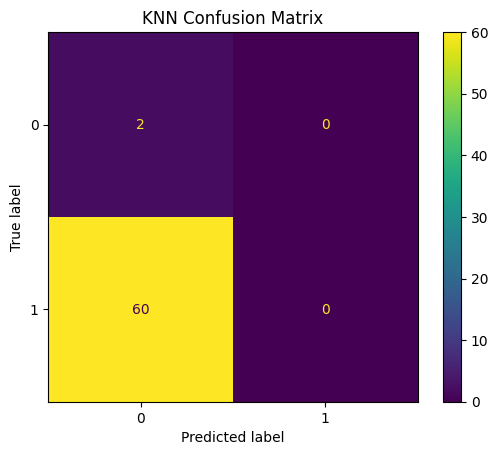

In [18]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)

disp_knn.plot()
plt.title("KNN Confusion Matrix")
plt.show()


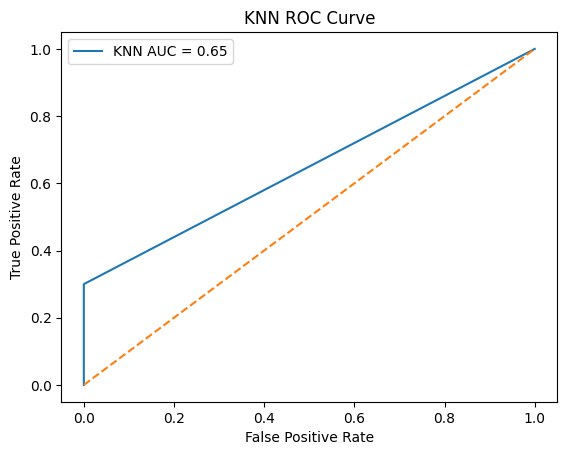

In [22]:

from sklearn.metrics import roc_curve, auc
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f"KNN AUC = {roc_auc_knn:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.show()
